In [1]:
import numpy as np
import pandas as pd

filename = 'training_data.csv'
dataset = pd.read_csv(filename, delimiter = '\t')

dataset.head()

In [2]:
X = dataset['comment']
y = dataset['score']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer='word', lowercase = True, stop_words='english').fit(X)

In [4]:
X = bow_transformer.transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
preds = regressor.predict(X)

In [22]:
pred_y= regressor.predict(X_test)

In [9]:
preds = np.where(preds > 10, 10, preds)
preds = np.where(preds < 0, 0, preds)

In [23]:
pred_y = np.where(pred_y > 10, 10, pred_y)
pred_y = np.where(pred_y < 0, 0, pred_y)

In [10]:
preds

array([ 6.44669047,  7.20438568,  8.86560387, ...,  9.99999637,
        9.00003462,  9.99971956])

In [24]:
pred_y

array([ 8.12846362,  8.84795424,  8.6072433 , ...,  8.64923625,
        1.45075717,  0.92838122])

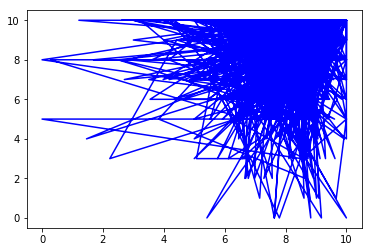

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.random.choice(preds,1000), np.random.choice(y, 1000), c="b")
plt.show()

In [12]:
df = pd.DataFrame(preds)

In [13]:
df.to_csv('comment_regression.csv')

In [14]:
sse = sum((preds-y)**2)
sse

466680.7925328695

In [25]:
sse_test = sum((pred_y-y_test)**2)
sse_test

124652.45163636915

In [16]:
mse = sse/len(y)
mse

3.0770094518443005

In [26]:
mse_test = sse_test/len(y_test)
mse_test

4.1093311675469488